# Establish the target (mean of SW dust data) and show the data
- Establish the target for dust manuscript work, save these data to relavent directory. 
- plot the monitor locations and the data seasonality and time series for season of interest
- This notebook loads the data established by Data/IMPROVE/subset_raw_IMPROVE_FEf_data.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as geo
import os
from matplotlib.gridspec import GridSpec

The southwest data being loaded here, were created by Data/IMPROVE/subset_raw_IMPROVE_FEf_data.ipynb, and the stations in the data were selected based on their 1995-2015 availability. 

In [2]:
start_year = 1995
end_year = 2015

In [3]:
usa = geo.read_file('../Data/GIS/cb_2017_us_state_500k') # read in US shapefile 
world = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
# Bring in the long range values that were used by ssubset_raw_IMPROVE_FEf_data.ipynb
lon_range = (-115., -102) # ~SW US
lat_range = (30., 42)     # ~ SW US

In [4]:
improve_dir = os.path.join("..","Data","IMPROVE","")
improve_dir

'../Data/IMPROVE/'

In [5]:
# NOTE: This may change, if the data says so...
dust_season = [3,4,5,6,7]

In [6]:
print(os.getcwd())

/Users/sbrey/GoogleDrive/sharedProjects/metSpread/Python


In [7]:
FEf_data = pd.read_csv(os.path.join(improve_dir, "southwest_FEf.csv")) # formerly a name with "four_corners" in it
sites_data = pd.read_csv(os.path.join(improve_dir,'southwest_FEf_sites.csv'))# formerly a name with "four_corners" in it

year_mask = (FEf_data.year.values >= start_year) & (FEf_data.year.values <= end_year)
FEf_data = FEf_data.loc[year_mask,:].copy()
print("min year:", FEf_data.year.min())
print("max year", FEf_data.year.max())

min year: 1995
max year 2015


Monitoring data are stored such that each row is a datapoint for a single measurement location. See example below. 

In [8]:
FEf_data.iloc[:7,:]

,Dataset,SiteCode,POC,Date,SiteName,Latitude,Longitude,Elevation,State,CountyFIPS,Value,Unc,MDL,Unit,StatusFlag,DateTime,year,month
626,IMPFSPED,BAND1,1,04-01-1995,Bandelier NM,35.7797,-106.2664,1988.3333,NM,35028,0.00576,0.00035,0.00015,ug/m^3 LC,V0,1995-01-04,1995,1
627,IMPFSPED,BAND1,1,07-01-1995,Bandelier NM,35.7797,-106.2664,1988.3333,NM,35028,0.00371,0.00025,0.00015,ug/m^3 LC,V0,1995-01-07,1995,1
628,IMPFSPED,BAND1,1,11-01-1995,Bandelier NM,35.7797,-106.2664,1988.3333,NM,35028,0.00719,0.00042,0.00015,ug/m^3 LC,V0,1995-01-11,1995,1
629,IMPFSPED,BAND1,1,14-01-1995,Bandelier NM,35.7797,-106.2664,1988.3333,NM,35028,0.00330,0.00022,0.00013,ug/m^3 LC,V0,1995-01-14,1995,1
630,IMPFSPED,BAND1,1,18-01-1995,Bandelier NM,35.7797,-106.2664,1988.3333,NM,35028,0.00404,0.00026,0.00013,ug/m^3 LC,V0,1995-01-18,1995,1
631,IMPFSPED,BAND1,1,21-01-1995,Bandelier NM,35.7797,-106.2664,1988.3333,NM,35028,0.00571,0.00034,0.00013,ug/m^3 LC,V0,1995-01-21,1995,1
632,IMPFSPED,BAND1,1,25-01-1995,Bandelier NM,35.7797,-106.2664,1988.3333,NM,35028,0.01033,0.00057,0.00013,ug/m^3 LC,V0,1995-01-25,1995,1


The associated site metadata can be retrieved from the sites_data dataframe

In [9]:
sites_data

,Site,Code,Dataset,State,County,Latitude,Longitude,Elevation,StartDate,EndDate,NumPOCs
0,Bandelier NM,BAND1,IMPFSPED,NM,35028,35.7797,-106.26640,1988,03/02/1988,06/28/2018,1
1,Bryce Canyon NP,BRCA1,IMPFSPED,UT,49017,37.6184,-112.17360,2481,03/02/1988,06/28/2018,1
2,Canyonlands NP,CANY1,IMPFSPED,UT,49037,38.4587,-109.82100,1798,03/02/1988,06/28/2018,1
3,Chiricahua NM,CHIR1,IMPFSPED,AZ,4003,32.0094,-109.38900,1554,03/02/1988,06/28/2018,1
4,Gila Wilderness,GICL1,IMPFSPED,NM,35003,33.2204,-108.23510,1775,03/02/1994,06/28/2018,1
5,Great Basin NP,GRBA1,IMPFSPED,NV,32033,39.0052,-114.21610,2065,03/04/1992,06/28/2018,1
6,Great Sand Dunes NM,GRSA1,IMPFSPED,CO,8003,37.7249,-105.51850,2498,03/02/1988,06/28/2018,1
7,Guadalupe Mountains NP,GUMO1,IMPFSPED,TX,48109,31.8330,-104.80940,1672,03/02/1988,06/28/2018,1
8,Meadview,MEAD1,IMPFSPED,AZ,4015,36.0193,-114.06840,902,09/04/1991,06/28/2018,1
9,Mesa Verde NP,MEVE1,IMPFSPED,CO,8083,37.1984,-108.49070,2172,03/02/1988,06/28/2018,2


#### Show where the data are located and the box where environmental variables will be averaged over. 

In [10]:
from shapely.geometry import Polygon
from descartes import PolygonPatch

In [11]:
P = Polygon([(lon_range[0], lat_range[0]), 
         (lon_range[1], lat_range[0]), 
         (lon_range[1], lat_range[1]), 
         (lon_range[0],lat_range[1])])

In [12]:
print(lon_range)
print(lat_range)

(-115.0, -102)
(30.0, 42)


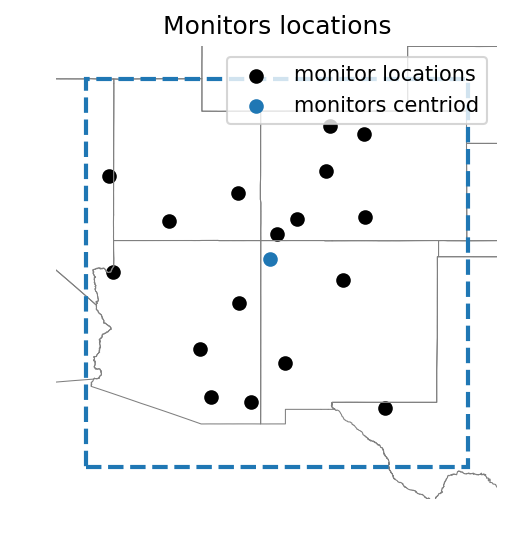

In [13]:
plt.figure(dpi=150)
ax1 = plt.subplot(111)
plt.scatter(sites_data.Longitude, sites_data.Latitude, c="k", label="monitor locations")
usa.plot(ax=ax1, facecolor='none', edgecolor="gray", linewidth=0.5)

ax1.add_patch(PolygonPatch(P, fc="none", ec="C0", linestyle="--",  linewidth=2, zorder=2 ))
# Show a border a bit larget than the study area for clarity
ax1.set_xlim( (lon_range[0]-1, lon_range[1]+1) )
ax1.set_ylim( (lat_range[0]-1, lat_range[1]+1) )
ax1.axis('off')
plt.title("Monitors locations")

plt.scatter(FEf_data.Longitude.mean(), FEf_data.Latitude.mean(), label='monitors centriod')
plt.legend(loc='best')

ax1.set_aspect(1.1)
plt.show()

Figure out how to express Iran as dust basaed on metrics specified in the paper : "fine dust was assumed to be 3.5% Fe based on crustal abundances [Taylor and McLennan, 1985]"

$$Fe=\frac{3.5}{100}dust$$

$$dust=Fe\frac{100}{3.5}=Fe\times 28.57142$$

In [14]:
Fe_to_dust = 100./3.5
print("Fe_to_dust Multiplier:", Fe_to_dust)

Fe_to_dust Multiplier: 28.571428571428573


In [15]:
print("mean dust conc all data %f :" %(FEf_data.Value.mean()*Fe_to_dust) )

mean dust conc all data 1.296605 :


TODO: Consider additional spatial cuttoffs here. Might want to limit this to "SW" and use the same definition as Hand et al 2016. 
- "Regionally aggregated concentrations and trends were computed for long-term (LT) sites operating continuously over the 20year time period in the SW region, defined here to include sites in Utah, Colorado, Arizona, New Mexico, and southwestern Texas". [Table S1](https://agupubs.onlinelibrary.wiley.com/action/downloadSupplement?doi=10.1002%2F2016GL068519&file=grl54316-sup-0001-SuppInfo.pdf) with sites used for SW in that study

In [16]:
print(type(FEf_data.loc[:,"DateTime"].values[0]))
print((FEf_data.loc[:,"DateTime"].values[0]))

<class 'str'>
1995-01-04


In [17]:
# Add a month and year column but first you need a DateTime object
FEf_data.loc[:,"DateTime"] = pd.to_datetime(FEf_data.loc[:,"DateTime"], format="%Y-%m-%d")

In [18]:
# Subset the data to the numeric columns to prep grouping by month and taking the mean
numeric_data = FEf_data[["month", "year", "Value", "Latitude", "Longitude"]].copy()
numeric_data.iloc[:4,:]

,month,year,Value,Latitude,Longitude
626,1,1995,0.00576,35.7797,-106.2664
627,1,1995,0.00371,35.7797,-106.2664
628,1,1995,0.00719,35.7797,-106.2664
629,1,1995,0.00330,35.7797,-106.2664


In [19]:
monthly_data = numeric_data.groupby(['month']).mean()

In [20]:
monthly_data

,year,Value,Latitude,Longitude
month,,,,
1,2005.886894,0.017062,36.426094,-108.740435
2,2005.785762,0.023898,36.397911,-108.762152
3,2005.767331,0.053511,36.429379,-108.751227
4,2005.693115,0.095684,36.410673,-108.759848
5,2005.690941,0.089942,36.424693,-108.732126
6,2005.855870,0.069548,36.459418,-108.753280
7,2005.736111,0.051029,36.462715,-108.752852
8,2005.744545,0.036417,36.454831,-108.712283
9,2005.671890,0.030721,36.430807,-108.728216


Create a yearly dataframe that takes the mean of the months of interest 3-7 of the monthly_data

In [21]:
yearly_data = numeric_data.groupby(['year', 'month']).mean()
yearly_data.iloc[:13,:]

Value   Latitude   Longitude
year month                                 
1995 1      0.007488  36.773804 -108.656694
     2      0.017337  36.629113 -108.505810
     3      0.022378  36.626287 -108.420410
     4      0.057472  36.536469 -108.492109
     5      0.067788  36.542946 -108.452609
     6      0.055139  36.663458 -108.514016
     7      0.039880  36.778725 -108.439283
     8      0.035580  36.557687 -108.400503
     9      0.022869  36.607561 -108.435871
     10     0.051574  36.606734 -108.435009
     11     0.017287  36.595061 -108.454694
     12     0.019182  36.852447 -108.417498
1996 1      0.021302  36.553681 -108.645577

In [22]:
# Show subset of all years for dust_season months
yearly_data.loc[(slice(None), dust_season), :]

Value   Latitude   Longitude
year month                                 
1995 3      0.022378  36.626287 -108.420410
     4      0.057472  36.536469 -108.492109
     5      0.067788  36.542946 -108.452609
     6      0.055139  36.663458 -108.514016
     7      0.039880  36.778725 -108.439283
1996 3      0.053986  36.572525 -108.349640
     4      0.089324  36.583732 -108.458975
     5      0.090972  36.614013 -108.442592
     6      0.053990  36.738647 -108.556769
     7      0.036805  36.519729 -108.476991
1997 3      0.033476  36.628875 -108.444644
     4      0.058427  36.625478 -108.432692
     5      0.047791  36.637116 -108.422643
     6      0.040859  36.614013 -108.442592
     7      0.050839  36.597702 -108.411657
1998 3      0.032118  36.619916 -108.423507
     4      0.069200  36.647095 -108.391170
     5      0.070333  36.625478 -108.432692
     6      0.048477  36.547500 -108.472524
     7      0.044646  36.706768 -108.494972
1999 3      0.092379  36.537938 -108.430788
     4      0.073569  36.387405 -108.441233
     5      0.077824  36.608383 -108.365379
     6      0.053674  36.568746 -108.355836
     7      0.036247  36.598014 -108.454399
2000 3      0.027405  36.192977 -108.641059
     4      0.116065  36.056353 -108.880370
     5      0.101687  36.241885 -108.526200
     6      0.066279  36.311287 -108.421215
     7      0.048830  36.367277 -108.493451
...              ...        ...         ...
2010 3      0.046728  36.423808 -108.865252
     4      0.106421  36.307749 -108.900510
     5      0.092182  36.361621 -108.909588
     6      0.060344  36.440414 -108.913881
     7      0.044562  36.414811 -108.997135
2011 3      0.073786  36.634581 -108.667229
     4      0.116659  36.633517 -108.714328
     5      0.086874  36.357783 -108.816327
     6      0.074260  36.402476 -108.983080
     7      0.061252  36.330518 -108.872841
2012 3      0.095863  36.356970 -108.836094
     4      0.103054  36.636891 -108.808229
     5      0.114860  36.446760 -108.894400
     6      0.086774  36.478875 -108.859319
     7      0.044960  36.435024 -108.731396
2013 3      0.070472  36.401554 -108.773828
     4      0.128432  36.267046 -108.794450
     5      0.096144  36.368232 -108.794548
     6      0.096810  36.439129 -108.805831
     7      0.047678  36.424166 -108.940723
2014 3      0.074702  36.311459 -108.946002
     4      0.073181  36.337884 -108.922942
     5      0.108177  36.368747 -108.856326
     6      0.090945  36.379995 -108.783077
     7      0.069971  36.491930 -108.976044
2015 3      0.043029  36.457906 -108.928028
     4      0.078541  36.390226 -108.874937
     5      0.046547  36.428126 -108.915124
     6      0.056826  36.318835 -108.865822
     7      0.036427  36.387437 -108.915817

[105 rows x 3 columns]

In [23]:
# Here is how you would get a given years dust season values rather
# than a slice over all years 
yearly_data.loc[(1995, dust_season), :].Value

year  month
1995  3        0.022378
      4        0.057472
      5        0.067788
      6        0.055139
      7        0.039880
Name: Value, dtype: float64

In [24]:
np.mean(yearly_data.loc[(1995, dust_season), :].Value)

0.04853152521246234

Create a dataframe for the dust season, averaging the months of interest, for each year. 

In [25]:
dust_season_data = yearly_data.loc[(slice(None), dust_season), :].groupby(["year"]).mean().copy()
dust_season_data

,Value,Latitude,Longitude
year,,,
1995,0.048532,36.629577,-108.463686
1996,0.065015,36.605729,-108.456993
1997,0.046279,36.620637,-108.430846
1998,0.052955,36.629351,-108.442973
1999,0.066739,36.540097,-108.409527
2000,0.072053,36.233956,-108.592459
2001,0.075048,36.473918,-108.467020
2002,0.097184,36.238848,-108.616971
2003,0.083850,36.490324,-108.863275


In [26]:
min_year = dust_season_data.index.values.min()
max_year = dust_season_data.index.values.max()
print(min_year)
print(max_year)

1995
2015


### Manuscript Figure 2
- TODO: Draw a box around the map with the bounds used for the gridded data

In [27]:
import seaborn as sns

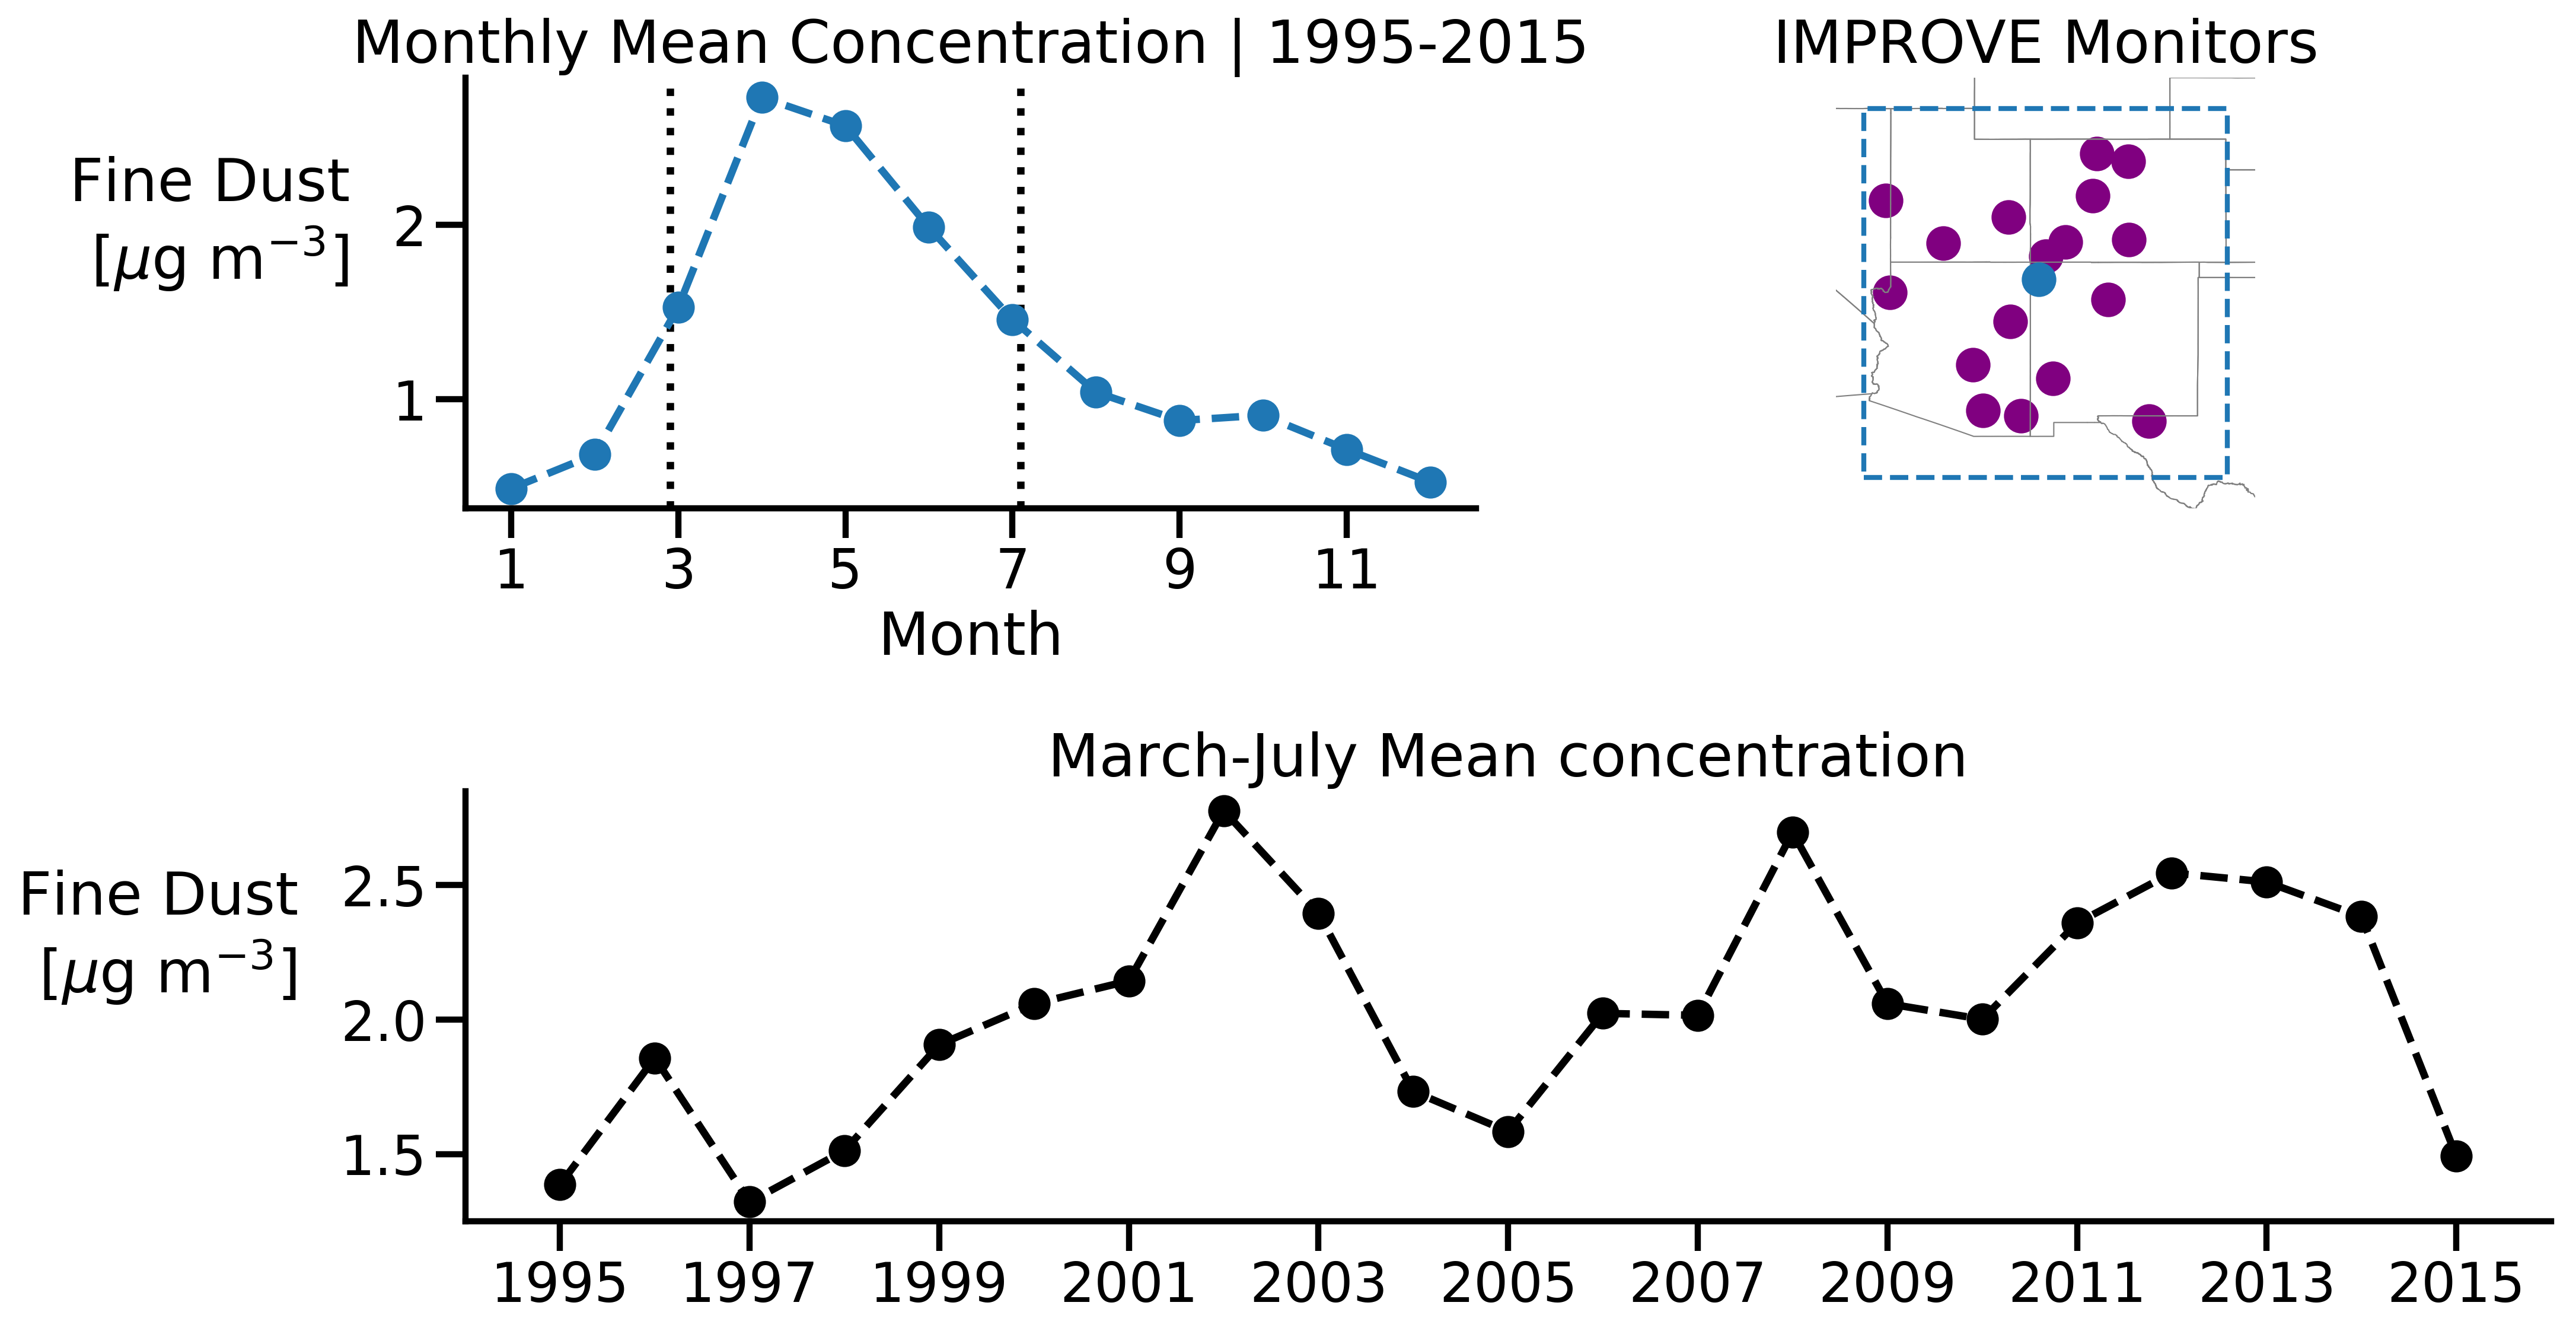

In [28]:
with sns.plotting_context("poster") :

    fig=plt.figure(dpi=300, figsize=(15,8))

    gs=GridSpec(2,2) # 2 rows, 2 columns

    # Plot the fine dust data climatology ---------------
    ax1=fig.add_subplot(gs[0,0]) # First row, first column
    plt.plot(monthly_data.index, (monthly_data.Value*Fe_to_dust),"--o", label="fine dust")
    plt.xticks(monthly_data.index.values[::2])
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    plt.ylabel("Fine Dust \n[$\mu$g m$^{-3}$]", rotation=0, labelpad=70)
    plt.xlabel("Month")
    plt.title("Monthly Mean Concentration | " + str(min_year) + "-" + str(max_year) )
    #plt.legend(loc="best")

    plt.axvline(x=2.9, c="k", linestyle=":", zorder=0)
    plt.axvline(x=7.1, c="k", linestyle=":", zorder=0)

    # Plot monitor locations ---------------
    ax2=fig.add_subplot(gs[0,1]) # First row, second column
    plt.scatter(sites_data.Longitude, sites_data.Latitude, c="purple", label="locations")
    usa.plot(ax=ax2, facecolor='none', edgecolor="gray", linewidth=0.5)
    ax2.add_patch(PolygonPatch(P, fc="none", ec="C0", linestyle="--",  linewidth=2, zorder=2 ))
    # Show a border a bit larget than the study area for clarity
    ax2.set_xlim( (lon_range[0]-1, lon_range[1]+1) )
    ax2.set_ylim( (lat_range[0]-1, lat_range[1]+1) )
    ax2.axis('off')
    plt.title("IMPROVE Monitors")
    plt.scatter(monthly_data.Longitude.mean(), monthly_data.Latitude.mean(), label='centriod')
    #plt.legend()
    ax2.set_aspect(1.1)

    # Plot the data time series ---------------
    ax3=fig.add_subplot(gs[1,:]) # Second row, span all columns
    plt.plot(dust_season_data.index.values, (dust_season_data.Value*Fe_to_dust), "--o", c="k")
    plt.xticks(dust_season_data.index.values[::2])
    plt.title("March-July Mean concentration")
    ax3.spines["top"].set_visible(False)
    ax3.spines['right'].set_visible(False)
    plt.ylabel("Fine Dust \n[$\mu$g m$^{-3}$]", rotation=0, labelpad=70)

    # bring plots closer together
    plt.subplots_adjust(wspace=0, hspace=0.3)
    plt.tight_layout()
    plt.savefig(os.path.join(improve_dir, "SW_dust_summary_figure.png"))
    plt.show()

- clear seasonality (top-left), not such a clear interannual signal when looking at all months averaged (bottom)
- April has the highest concentrations by a bit, followed by May, June, July, then March. Why so much work focussed on March then? Just because of a trend? 

### Save the dataframes where the data are organized by month and by year

In [29]:
monthly_data.to_csv( os.path.join(improve_dir, "Fe_monthly_means.csv") )

In [30]:
dust_season_data.to_csv( os.path.join(improve_dir, "Fe_seasonal_means.csv") )

In [31]:
# Create grouped dataframe with a multiindex 
df_ = numeric_data.groupby(["year", "month"]).mean()
df_

Value   Latitude   Longitude
year month                                 
1995 1      0.007488  36.773804 -108.656694
     2      0.017337  36.629113 -108.505810
     3      0.022378  36.626287 -108.420410
     4      0.057472  36.536469 -108.492109
     5      0.067788  36.542946 -108.452609
     6      0.055139  36.663458 -108.514016
     7      0.039880  36.778725 -108.439283
     8      0.035580  36.557687 -108.400503
     9      0.022869  36.607561 -108.435871
     10     0.051574  36.606734 -108.435009
     11     0.017287  36.595061 -108.454694
     12     0.019182  36.852447 -108.417498
1996 1      0.021302  36.553681 -108.645577
     2      0.032278  36.546257 -108.457014
     3      0.053986  36.572525 -108.349640
     4      0.089324  36.583732 -108.458975
     5      0.090972  36.614013 -108.442592
     6      0.053990  36.738647 -108.556769
     7      0.036805  36.519729 -108.476991
     8      0.033692  36.619712 -108.420533
     9      0.023563  36.626924 -108.431444
     10     0.029230  36.664395 -108.494395
     11     0.014389  36.673511 -108.450016
     12     0.016201  36.587255 -108.436500
1997 1      0.008455  36.557637 -108.461087
     2      0.013577  36.573195 -108.478652
     3      0.033476  36.628875 -108.444644
     4      0.058427  36.625478 -108.432692
     5      0.047791  36.637116 -108.422643
     6      0.040859  36.614013 -108.442592
...              ...        ...         ...
2013 7      0.047678  36.424166 -108.940723
     8      0.037131  36.321204 -108.762320
     9      0.024712  36.425124 -108.819228
     10     0.029755  36.405323 -108.873487
     11     0.018753  36.601457 -109.019160
     12     0.011635  36.455118 -108.880626
2014 1      0.024263  36.293346 -108.786348
     2      0.027665  36.380763 -108.920699
     3      0.074702  36.311459 -108.946002
     4      0.073181  36.337884 -108.922942
     5      0.108177  36.368747 -108.856326
     6      0.090945  36.379995 -108.783077
     7      0.069971  36.491930 -108.976044
     8      0.027245  36.445087 -108.625019
     9      0.024575  36.450211 -108.746626
     10     0.025595  36.363776 -108.816577
     11     0.023328  36.437891 -109.040230
     12     0.012797  36.514894 -109.080785
2015 1      0.007882  36.448071 -108.937113
     2      0.016982  36.369070 -108.924561
     3      0.043029  36.457906 -108.928028
     4      0.078541  36.390226 -108.874937
     5      0.046547  36.428126 -108.915124
     6      0.056826  36.318835 -108.865822
     7      0.036427  36.387437 -108.915817
     8      0.032256  36.268489 -108.926655
     9      0.026654  36.394721 -108.923309
     10     0.016242  36.349976 -108.884213
     11     0.019426  36.385340 -108.887515
     12     0.015767  36.381339 -108.866664

[252 rows x 3 columns]

In [32]:
# This is how you get a single value with a multiindex 
df_.loc[(1999,3)]

Value          0.092379
Latitude      36.537938
Longitude   -108.430788
Name: (1999, 3), dtype: float64

In [33]:
# df_.loc[(slice(None), slice(None)), :] # to get all

In [34]:
years = np.unique(df_.index.get_level_values('year').values)
months = np.unique(df_.index.get_level_values('month').values)
print(np.unique(years))
print(np.unique(months))

[1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008
 2009 2010 2011 2012 2013 2014 2015]
[ 1  2  3  4  5  6  7  8  9 10 11 12]


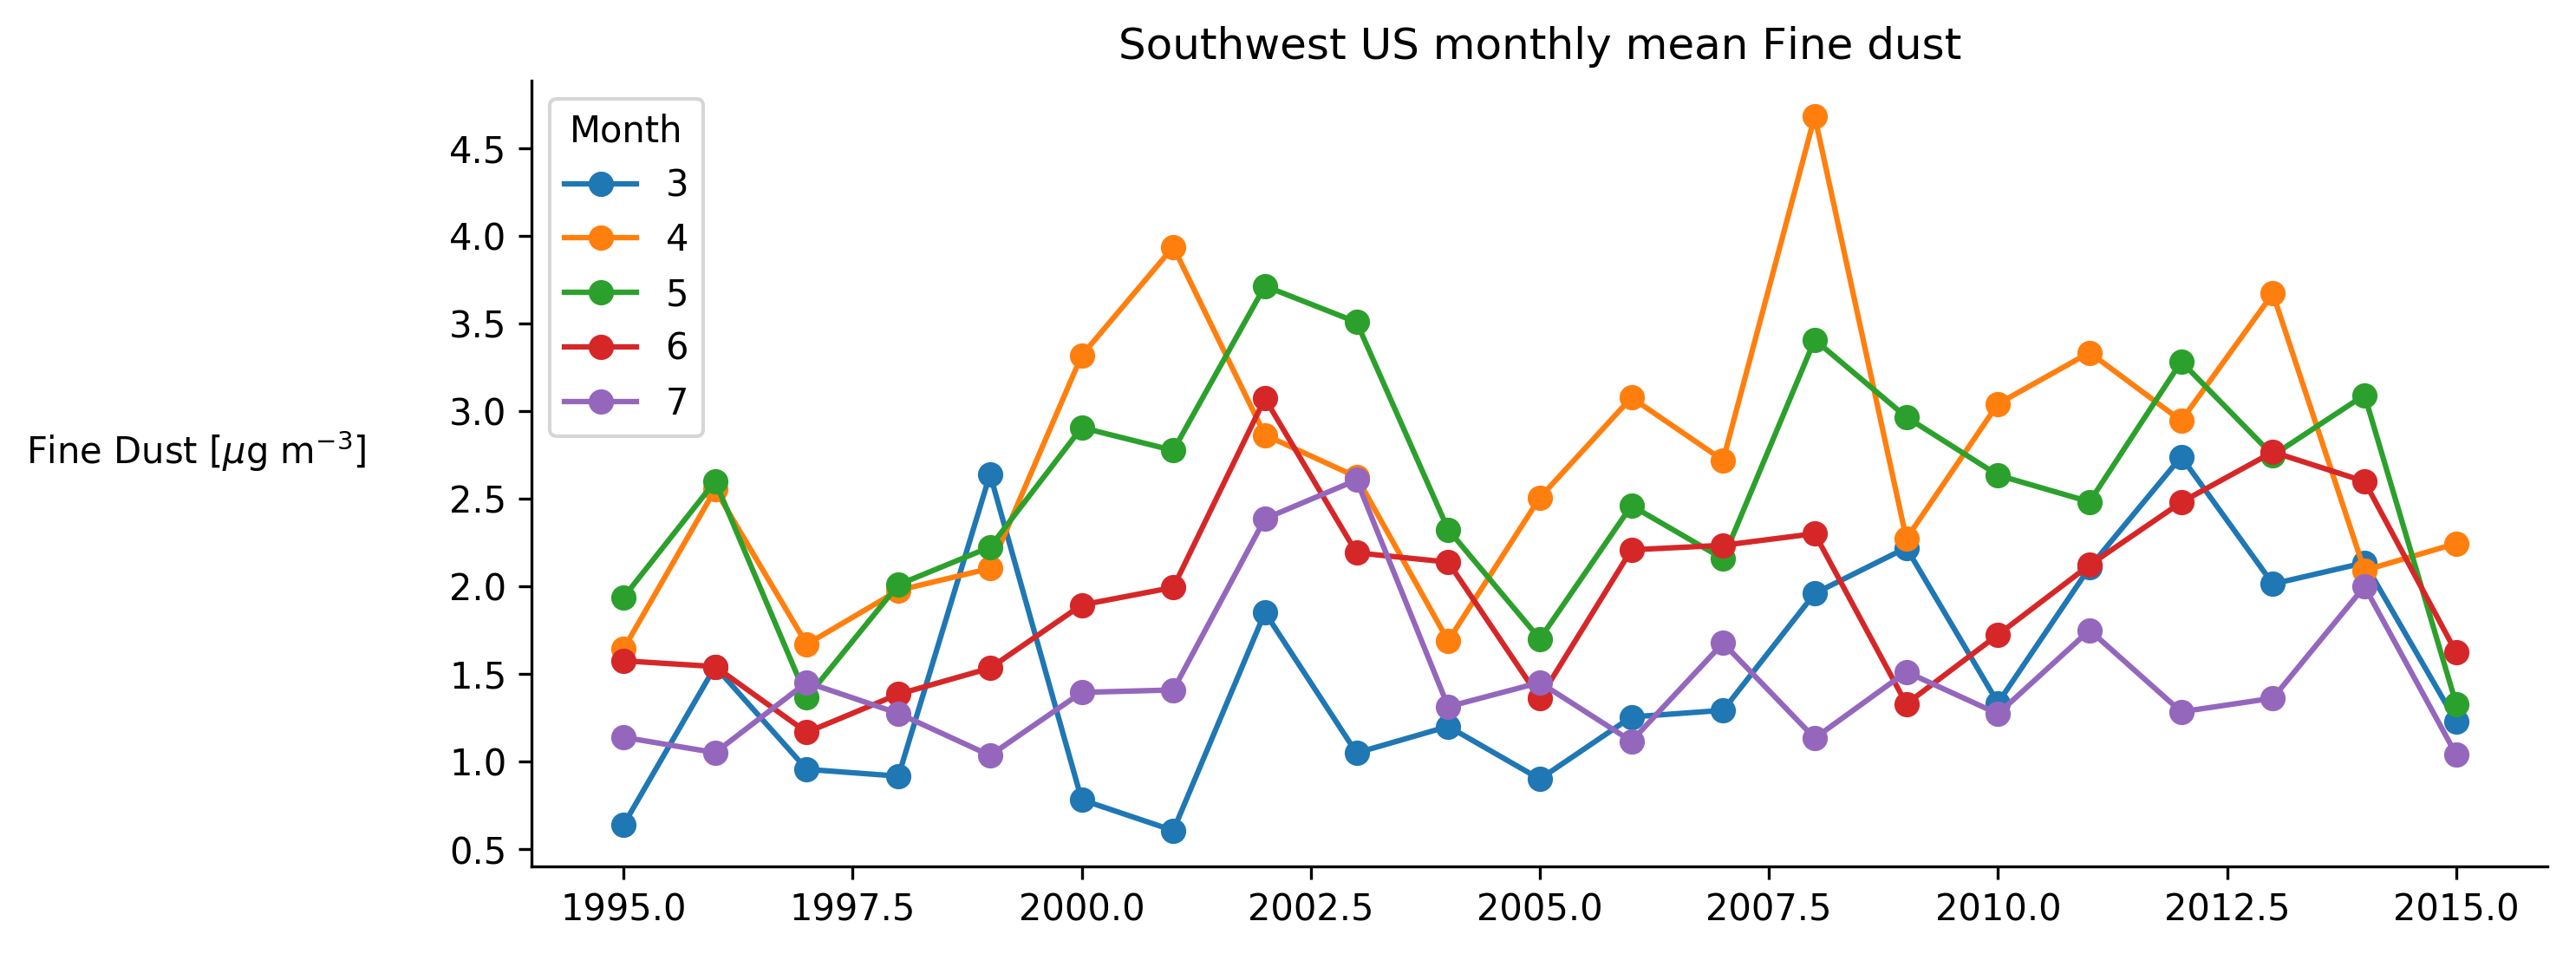

In [35]:
# Plot each months time series 
fig = plt.figure(dpi=300, figsize=(10,4))
ax=plt.subplot(111)

for mon in [3,4,5,6,7] : 
    # Once month mean data at a time
    y = df_.loc[(slice(None), mon), "Value"] * Fe_to_dust
    ax.plot(years, y, "-o", label=mon)

ax.spines["top"].set_visible(False)    
ax.spines["right"].set_visible(False)   

plt.ylabel("Fine Dust [$\mu$g m$^{-3}$]", rotation=0, labelpad=70)
plt.title("Southwest US monthly mean Fine dust")

# Mean of the bunch, choosing level year,
#df_.loc[(slice(None), [3,4,5,6] ), :].groupby(level=['year']).mean().Value.plot(label="3-6 mean", linewidth=3)

plt.legend(title="Month")

plt.show()

Just as seen in Hand et al 2016
- April has the highest concentrations
- March has an upward trend, though not completely obvious by looking at the time series. To me it looks like the year to year and ~4 year cycles are the bigger story. This is good news for our goal of trying to predict year to year dust concentrations. 

## Plot the monthly mean values on a map

In [36]:
print(FEf_data.columns.values)

['Dataset' 'SiteCode' 'POC' 'Date' 'SiteName' 'Latitude' 'Longitude'
 'Elevation' 'State' 'CountyFIPS' 'Value' 'Unc' 'MDL' 'Unit' 'StatusFlag'
 'DateTime' 'year' 'month']


In [37]:
print(numeric_data.columns.values)

['month' 'year' 'Value' 'Latitude' 'Longitude']


In [38]:
site_means = FEf_data.groupby(["SiteName", "month"]).mean()
site_means["FineDust"] = (site_means.loc[:,"Value"] * Fe_to_dust)

In [39]:
site_means

POC  Latitude  Longitude  Elevation  CountyFIPS  \
SiteName             month                                                    
Bandelier NM         1      1.0   35.7797 -106.26640  1988.3333     35028.0   
                     2      1.0   35.7797 -106.26640  1988.3333     35028.0   
                     3      1.0   35.7797 -106.26640  1988.3333     35028.0   
                     4      1.0   35.7797 -106.26640  1988.3333     35028.0   
                     5      1.0   35.7797 -106.26640  1988.3333     35028.0   
                     6      1.0   35.7797 -106.26640  1988.3333     35028.0   
                     7      1.0   35.7797 -106.26640  1988.3333     35028.0   
                     8      1.0   35.7797 -106.26640  1988.3333     35028.0   
                     9      1.0   35.7797 -106.26640  1988.3333     35028.0   
                     10     1.0   35.7797 -106.26640  1988.3333     35028.0   
                     11     1.0   35.7797 -106.26640  1988.3333     35028.0   
                     12     1.0   35.7797 -106.26640  1988.3333     35028.0   
Bryce Canyon NP      1      1.0   37.6184 -112.17360  2481.3333     49017.0   
                     2      1.0   37.6184 -112.17360  2481.3333     49017.0   
                     3      1.0   37.6184 -112.17360  2481.3333     49017.0   
                     4      1.0   37.6184 -112.17360  2481.3333     49017.0   
                     5      1.0   37.6184 -112.17360  2481.3333     49017.0   
                     6      1.0   37.6184 -112.17360  2481.3333     49017.0   
                     7      1.0   37.6184 -112.17360  2481.3333     49017.0   
                     8      1.0   37.6184 -112.17360  2481.3333     49017.0   
                     9      1.0   37.6184 -112.17360  2481.3333     49017.0   
                     10     1.0   37.6184 -112.17360  2481.3333     49017.0   
                     11     1.0   37.6184 -112.17360  2481.3333     49017.0   
                     12     1.0   37.6184 -112.17360  2481.3333     49017.0   
Canyonlands NP       1      1.0   38.4587 -109.82100  1798.2500     49037.0   
                     2      1.0   38.4587 -109.82100  1798.2500     49037.0   
                     3      1.0   38.4587 -109.82100  1798.2500     49037.0   
                     4      1.0   38.4587 -109.82100  1798.2500     49037.0   
                     5      1.0   38.4587 -109.82100  1798.2500     49037.0   
                     6      1.0   38.4587 -109.82100  1798.2500     49037.0   
...                         ...       ...        ...        ...         ...   
Tonto NM             7      1.0   33.6548 -111.10680   775.0000      4007.0   
                     8      1.0   33.6548 -111.10680   775.0000      4007.0   
                     9      1.0   33.6548 -111.10680   775.0000      4007.0   
                     10     1.0   33.6548 -111.10680   775.0000      4007.0   
                     11     1.0   33.6548 -111.10680   775.0000      4007.0   
                     12     1.0   33.6548 -111.10680   775.0000      4007.0   
Weminuche Wilderness 1      1.0   37.6594 -107.79988  2750.0000      8111.0   
                     2      1.0   37.6594 -107.79988  2750.0000      8111.0   
                     3      1.0   37.6594 -107.79988  2750.0000      8111.0   
                     4      1.0   37.6594 -107.79988  2750.0000      8111.0   
                     5      1.0   37.6594 -107.79988  2750.0000      8111.0   
                     6      1.0   37.6594 -107.79988  2750.0000      8111.0   
                     7      1.0   37.6594 -107.79988  2750.0000      8111.0   
                     8      1.0   37.6594 -107.79988  2750.0000      8111.0   
                     9      1.0   37.6594 -107.79988  2750.0000      8111.0   
                     10     1.0   37.6594 -107.79988  2750.0000      8111.0   
                     11     1.0   37.6594 -107.79988  2750.0000      8111.0   
                     12     1.0   37.6594 -107.79988  2750.0000      8111.0   

In [40]:
dust_season

[3, 4, 5, 6, 7]

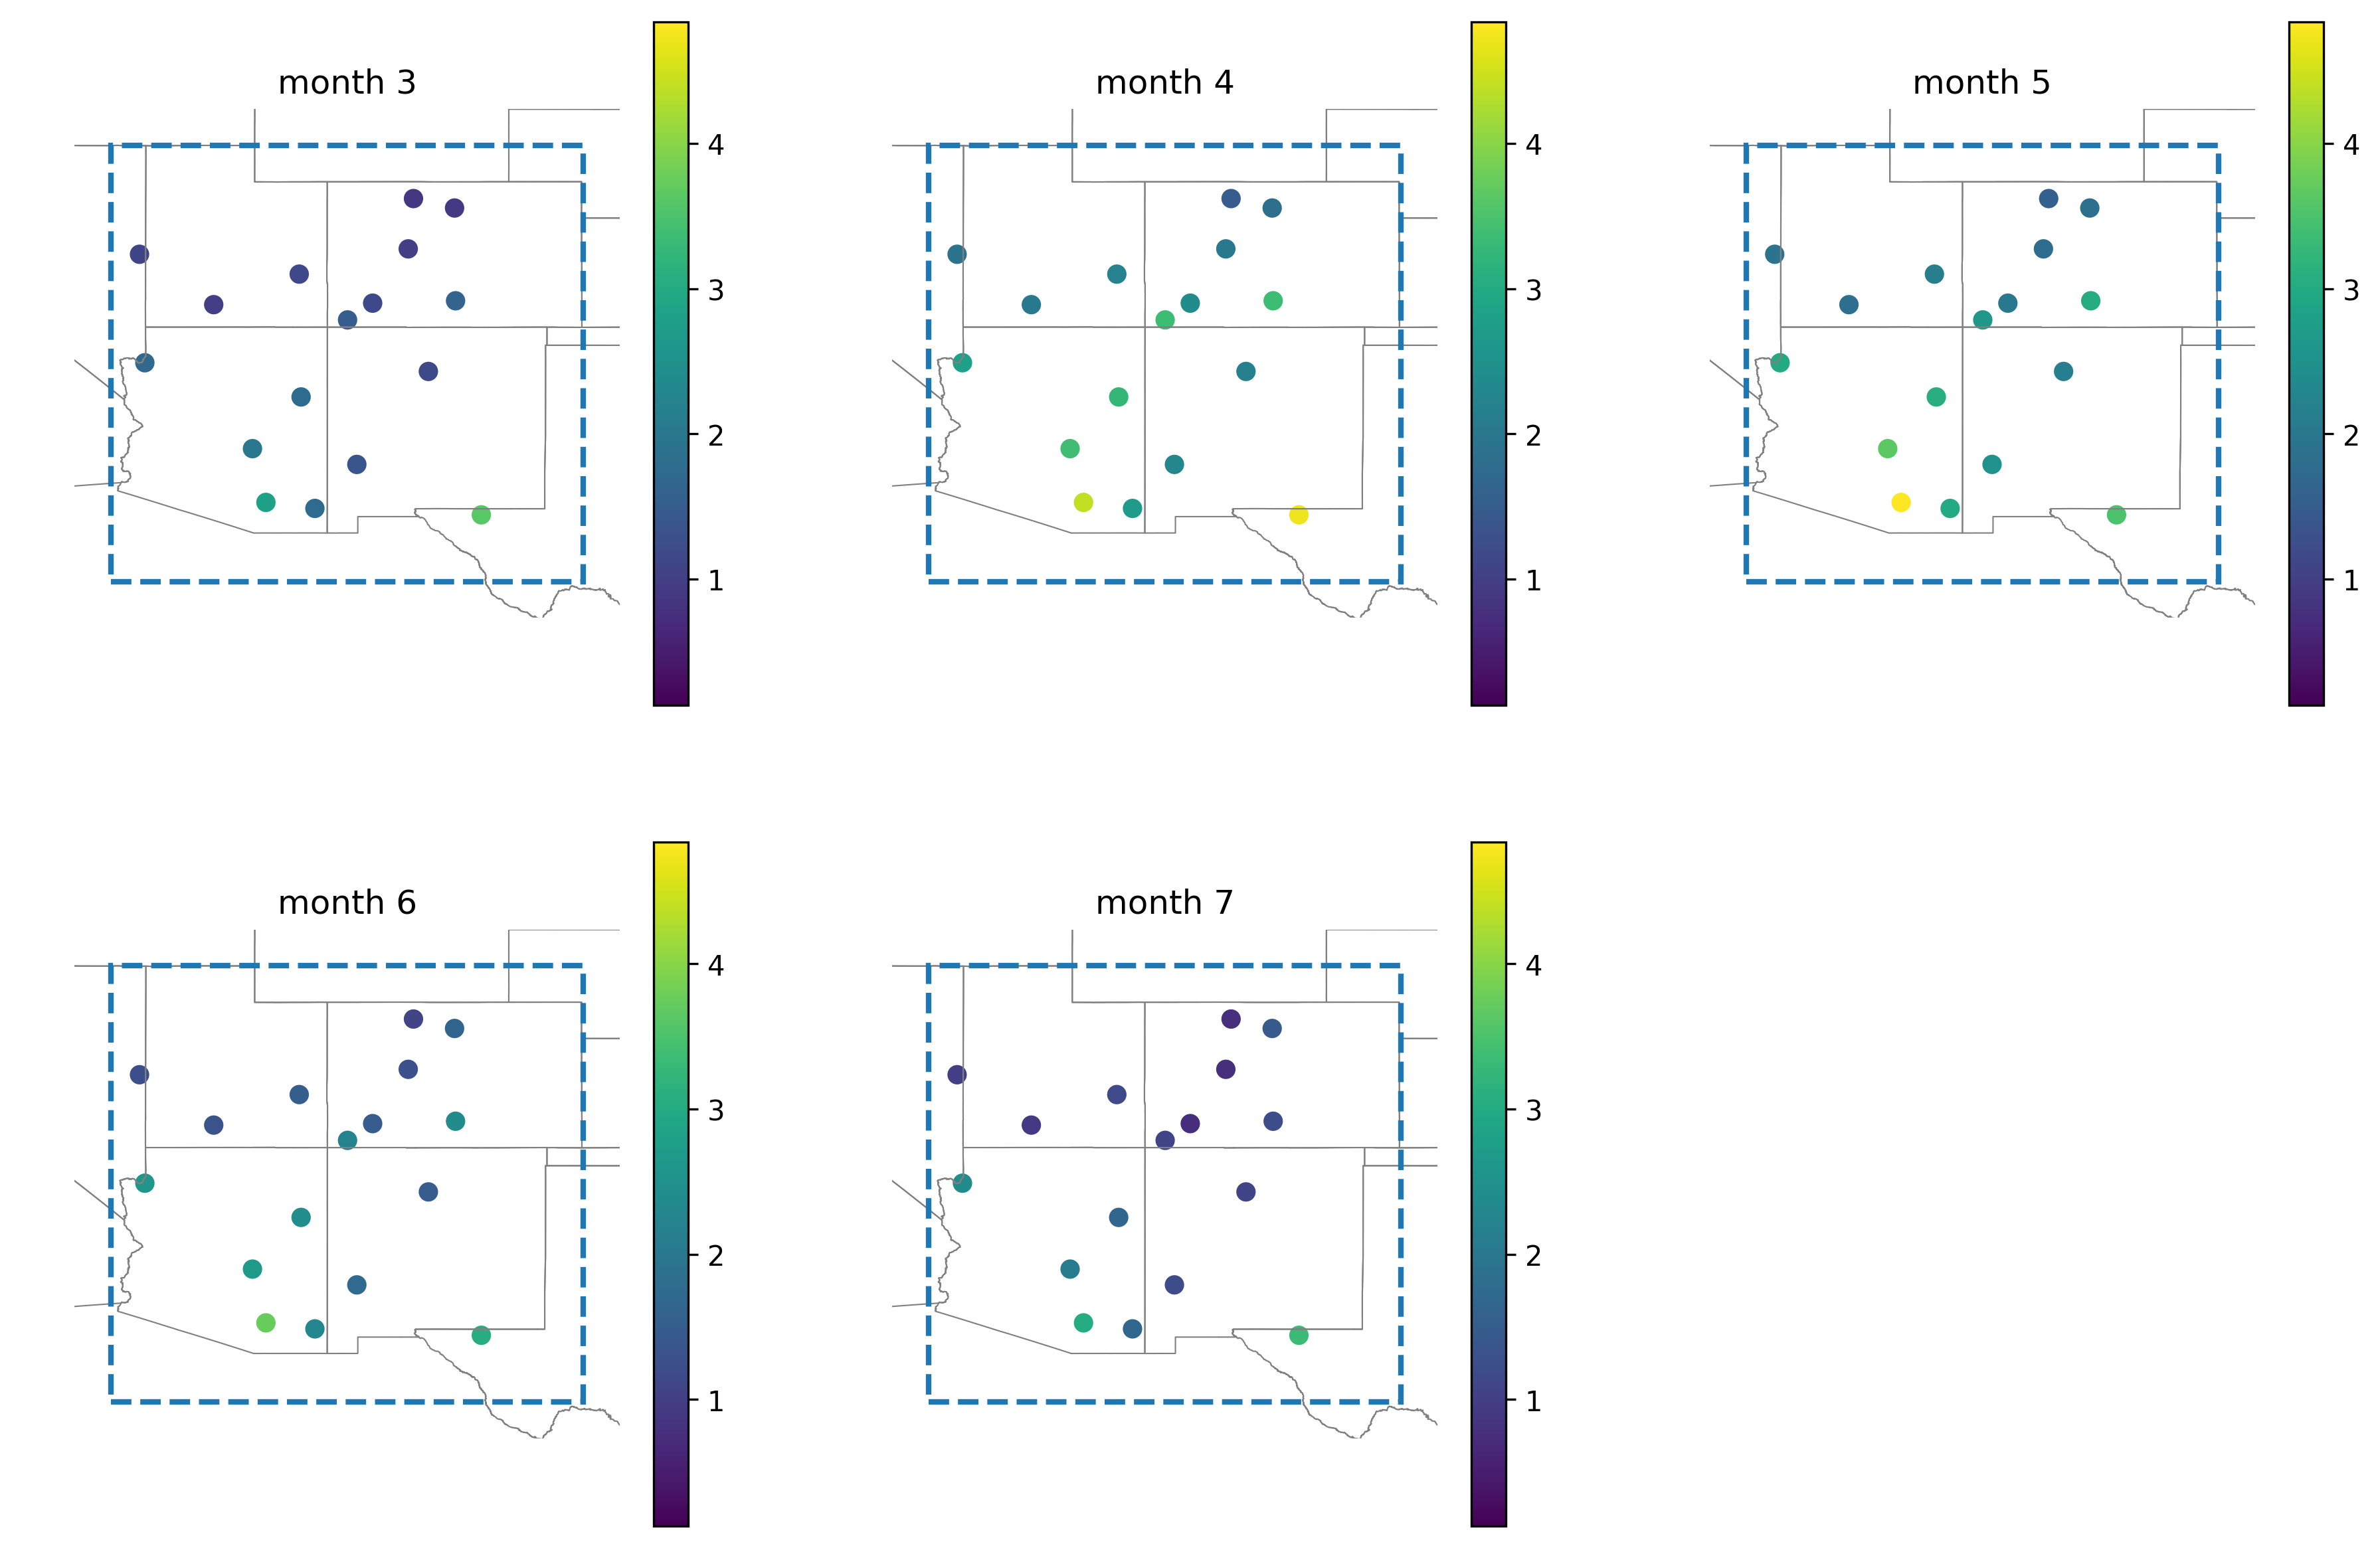

In [41]:
# e.g. yearly slice mean values for specified month levels. 
fig = plt.figure(dpi=300, figsize=(15,10))

i = 0
for m in dust_season : 
    
    # subset the site data to the give month only 
    site_month = site_means.loc[(slice(None), [m] ), :].copy()
    
    i += 1
    ax=plt.subplot(2,3,i)

    plt.scatter(x=site_month.Longitude, y=site_month.Latitude, c=(site_month.FineDust), vmin=site_means.FineDust.min(), vmax=site_means.FineDust.max())
    usa.plot(ax=ax, facecolor='none', edgecolor="gray", linewidth=0.5)
    ax.add_patch(PolygonPatch(P, fc="none", ec="C0", linestyle="--",  linewidth=2, zorder=2 ))
    # Show a border a bit larget than the study area for clarity
    ax.set_xlim( (lon_range[0]-1, lon_range[1]+1) )
    ax.set_ylim( (lat_range[0]-1, lat_range[1]+1) )
    ax.axis('off')
    plt.colorbar()
    plt.title("month " + str(m))
    
plt.show()